# Model

In [80]:
#Model
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X,y=mnist['data'],mnist['target']
X_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
#training data üzerinden shuffle_index
np.random.seed(1)
shuffle_index=np.random.permutation(60000)
X_train=X_train[shuffle_index]
y_train=y_train[shuffle_index]

#Stokastik Gradyan Deseni
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)

sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Performans Kontrolü

In [30]:
#model hazır modelin gücüne training data üzerinden bakalım, henüz test sette deneme yapmadık
#acc
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([ 0.85237952,  0.87309365,  0.86427964])

In [34]:
#conf matrix
from sklearn.model_selection import  cross_val_predict
#5 olup olmadıığı
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5712,    6,   12,   16,   15,   30,   15,    8,   57,   52],
       [   1, 6554,   45,   24,    6,    9,    1,    7,   45,   50],
       [  62,   80, 5187,  150,   75,   14,   51,   80,  208,   51],
       [  54,   49,  158, 5196,   22,  152,   28,   58,  158,  256],
       [  27,   42,   30,   15, 5066,   14,   23,   31,   96,  498],
       [ 115,   96,   42,  461,   81, 3908,   76,   56,  409,  177],
       [  84,   67,  143,   34,  109,  127, 5255,   10,   57,   32],
       [  38,   39,   53,   52,   57,   12,    5, 5551,   32,  426],
       [  58,  317,  106,  235,   72,  197,   32,   49, 4370,  415],
       [  34,   65,   14,  123,  220,   41,    1,  368,   87, 4996]], dtype=int64)

In [39]:
#recall
from sklearn.metrics import recall_score
recall_score(y_train,y_train_pred,average=None)

array([ 0.96437616,  0.9721151 ,  0.87059416,  0.84749633,  0.86716878,
        0.7209002 ,  0.88796891,  0.88603352,  0.74688088,  0.83980501])

In [37]:
#prec
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred,average=None)

array([ 0.92352466,  0.89596719,  0.89585492,  0.82397716,  0.88520007,
        0.86767318,  0.95771824,  0.89273078,  0.79181011,  0.71853876])

Klasların denglei dağılımını bildiğimizden ROC eğririsi çizdirelim

# Modeli güçlendirelim

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [47]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90971806,  0.90959548,  0.9106866 ])

Accuracy arttı

In [49]:
#conf matrix
from sklearn.model_selection import  cross_val_predict
#5 olup olmadıığı
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5726,    2,   21,   11,   11,   54,   48,    8,   38,    4],
       [   2, 6465,   49,   25,    6,   48,    6,   13,  116,   12],
       [  54,   37, 5335,   93,   88,   24,  100,   58,  155,   14],
       [  49,   37,  150, 5344,    3,  230,   38,   56,  129,   95],
       [  14,   26,   34,    9, 5402,    7,   54,   23,   84,  189],
       [  63,   40,   32,  194,   74, 4598,  104,   34,  195,   87],
       [  31,   26,   49,    2,   42,   87, 5627,    6,   48,    0],
       [  24,   21,   63,   33,   61,   10,    9, 5823,   13,  208],
       [  48,  153,   72,  174,   13,  163,   57,   27, 5009,  135],
       [  37,   28,   29,   87,  170,   28,    2,  216,   81, 5271]], dtype=int64)

In [51]:
#prec
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred,average=None)

array([ 0.94675926,  0.94586686,  0.91446692,  0.8948426 ,  0.92027257,
        0.87597638,  0.93085194,  0.9295977 ,  0.85361282,  0.87630923])

In [50]:
#recall
from sklearn.metrics import recall_score
recall_score(y_train,y_train_pred,average=None)

array([ 0.96673983,  0.95891427,  0.89543471,  0.87163595,  0.92468333,
        0.84818299,  0.95082798,  0.92944932,  0.85609298,  0.88603127])

 # X_scaled kullanan modeli seçelim

In [54]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Resmi al

In [76]:
from PIL import Image
import numpy as np
import pandas as pd
 
img = Image.open("C:\\Users\\suata\\Desktop\\scikit-ogren\\jupyter\\data\\8a.bmp")
arr = np.array(img)

import matplotlib
import matplotlib.pyplot as plt
df = pd.DataFrame(arr, index=None)
df

0   1   2   3   4   5   6   7   8    9  ...   18   19   20  21  22  23  \
0    0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
1    0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
2    0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
3    0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
4    0   0   0   0   0   0   0   0   0    0 ...  255  255    0   0   0   0   
5    0   0   0   0   0   0   0   0   0  255 ...    0  255    0   0   0   0   
6    0   0   0   0   0   0   0   0   0  255 ...  255  255    0   0   0   0   
7    0   0   0   0   0   0   0   0   0  255 ...  255    0    0   0   0   0   
8    0   0   0   0   0   0   0   0   0  255 ...  255    0    0   0   0   0   
9    0   0   0   0   0   0   0   0   0    0 ...  255    0    0   0   0   0   
10   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
11   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
12   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
13   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
14   0   0   0   0   0   0   0   0   0    0 ...  255    0    0   0   0   0   
15   0   0   0   0   0   0   0   0   0    0 ...  255  255    0   0   0   0   
16   0   0   0   0   0   0   0   0   0    0 ...    0  255    0   0   0   0   
17   0   0   0   0   0   0   0   0   0    0 ...    0    0  255   0   0   0   
18   0   0   0   0   0   0   0   0   0    0 ...    0    0  255   0   0   0   
19   0   0   0   0   0   0   0   0   0    0 ...    0    0  255   0   0   0   
20   0   0   0   0   0   0   0   0   0    0 ...    0  255  255   0   0   0   
21   0   0   0   0   0   0   0   0   0    0 ...  255    0    0   0   0   0   
22   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
23   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
24   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
25   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
26   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   
27   0   0   0   0   0   0   0   0   0    0 ...    0    0    0   0   0   0   

    24  25  26  27  
0    0   0   0   0  
1    0   0   0   0  
2    0   0   0   0  
3    0   0   0   0  
4    0   0   0   0  
5    0   0   0   0  
6    0   0   0   0  
7    0   0   0   0  
8    0   0   0   0  
9    0   0   0   0  
10   0   0   0   0  
11   0   0   0   0  
12   0   0   0   0  
13   0   0   0   0  
14   0   0   0   0  
15   0   0   0   0  
16   0   0   0   0  
17   0   0   0   0  
18   0   0   0   0  
19   0   0   0   0  
20   0   0   0   0  
21   0   0   0   0  
22   0   0   0   0  
23   0   0   0   0  
24   0   0   0   0  
25   0   0   0   0  
26   0   0   0   0  
27   0   0   0   0  

[28 rows x 28 columns]

In [65]:
dijital_veri2=arr.flatten()

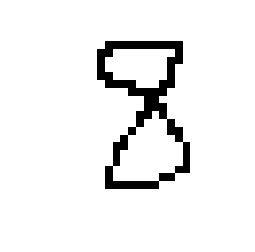

In [66]:
dijital_veri_resmi2=dijital_veri2.reshape(28,28)
plt.imshow(dijital_veri_resmi2,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

# Tahmin et

In [63]:
#Tahim exit
sgd_clf.predict([dijital_veri2])

array([ 2.])